In [1]:
# Basic imports
import scanpy as sc

import sys, os

# Add parent directory to Python path
sys.path.append(os.path.abspath(".."))  

# Import pipeline functions
from scrna_pipeline import standard_scrna_pipeline

/opt/miniconda3/envs/scrna-pipeline/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
# Path to raw AnnData file (adjust as needed)
raw_path = '/Users/alahi.irfan/Desktop/Local_workspace/Data/Melms_Nature_2021/GSE171524_RAW_merged.h5ad'

# Read the raw data
adata_raw = sc.read_h5ad(raw_path)

print(adata_raw)
adata_raw.obs.head()

AnnData object with n_obs × n_vars = 116314 × 34546
    obs: 'sample', 'file', 'batch'
    layers: 'counts'


,sample,file,batch
TAGGTACCATGGCCAC-1_1,GSM5226574_C51ctr,GSM5226574_C51ctr_raw_counts.csv.gz,0
ATTCACTGTAACAGGC-1_1,GSM5226574_C51ctr,GSM5226574_C51ctr_raw_counts.csv.gz,0
TAACTTCCAACCACGC-1_1,GSM5226574_C51ctr,GSM5226574_C51ctr_raw_counts.csv.gz,0
TTGGGTACACGACAAG-1_1,GSM5226574_C51ctr,GSM5226574_C51ctr_raw_counts.csv.gz,0
AGGCCACAGAGTCACG-1_1,GSM5226574_C51ctr,GSM5226574_C51ctr_raw_counts.csv.gz,0


In [3]:
print(adata_raw.var_names[:5])
print(adata_raw.obs_names[:5])

Index(['AL627309.1', 'AL627309.5', 'AL627309.4', 'AL669831.2', 'LINC01409'], dtype='object')
Index(['TAGGTACCATGGCCAC-1_1', 'ATTCACTGTAACAGGC-1_1', 'TAACTTCCAACCACGC-1_1',
       'TTGGGTACACGACAAG-1_1', 'AGGCCACAGAGTCACG-1_1'],
      dtype='object')


In [4]:
adata_raw.obs["sample"].value_counts().sort_values().head(10)

sample
GSM5226590_L10cov    1550
GSM5226595_L16cov    1822
GSM5226598_L19cov    2509
GSM5226597_L18cov    2816
GSM5226585_L05cov    3052
GSM5226581_L01cov    3060
GSM5226591_L11cov    3296
GSM5226599_L21cov    3425
GSM5226589_L09cov    3605
GSM5226583_L04cov    3630
Name: count, dtype: int64

In [5]:


# for s, n in adata_raw.obs["sample"].value_counts().items():
#     print(f"\nSample {s} (n={n})")
#     tmp = adata_raw[adata_raw.obs["sample"] == s].copy()
#     try:
#         sc.pp.highly_variable_genes(
#             tmp,
#             n_top_genes=2000,
#             flavor="seurat_v3",
#             layer="counts",
#             batch_key=None,   # per single-sample, no need for batch_key
#         )
#         print("  HVG OK")
#     except Exception as e:
#         print("  HVG FAILED:", e)


In [6]:
# Choose the column in adata.obs that encodes batch / sample.
# If you have no batches, you can set batch_key=None and batch_method="none".
batch_key = "sample"   # change if your column is named differently

# Run the standard pipeline:
# - QC + filters + Scrublet
# - HVGs (Seurat v3 on counts by default)
# - normalize/log + scale + PCA
# - Harmony batch correction
# - neighbors + Leiden + UMAP
adata_proc = standard_scrna_pipeline(
    adata_raw,
    batch_key=batch_key,

    # batch correction method
    batch_method="harmony",

    # HVG selection
    hvg_flavor= "seurat", #"seurat_v3",
    n_top_genes=2000,

    # clustering
    clustering_method="leiden",

    # 👇 All preprocessing options go here
    preprocess_kwargs={
        "use_ribo_filter": True,
        "use_mito_filter": True
    },
)


print(adata_proc)



[ scrna-pipeline ] Running standard scRNA-seq pipeline
  • Input AnnData shape: 116314 cells × 34546 genes
  • Batch key:         'sample'
  • Batch method:      'harmony'
  • HVG flavor:        'seurat'
  • n_top_genes:       2000
  • n_pcs:             50
  • Clustering:        'leiden'
  • Cluster resol.:    0.6
  • Preprocess kwargs: {'use_mito_filter': True, 'use_ribo_filter': True}
  • Batch kwargs:      {}
  • Cluster kwargs:    {}

Running Scrublet for doublet detection...
Removed 487 predicted doublets
After doublet removal: (102448, 32626)


/opt/miniconda3/envs/scrna-pipeline/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


[ scrna-pipeline ] Step 1 complete: preprocess_to_pca
  • PCA stored in .obsm['X_pca']
  • Genes after HVG selection: 2000
  • Cells after QC / Scrublet: 102448

Running Harmony batch correction using batch_key='sample'...


2025-12-05 13:02:02,134 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-12-05 13:02:06,110 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-12-05 13:02:06,275 - harmonypy - INFO - Iteration 1 of 10
2025-12-05 13:02:23,165 - harmonypy - INFO - Iteration 2 of 10
2025-12-05 13:17:54,169 - harmonypy - INFO - Iteration 3 of 10
2025-12-05 13:18:11,805 - harmonypy - INFO - Iteration 4 of 10
2025-12-05 13:18:28,566 - harmonypy - INFO - Iteration 5 of 10
2025-12-05 13:30:28,137 - harmonypy - INFO - Iteration 6 of 10
2025-12-05 13:30:44,676 - harmonypy - INFO - Iteration 7 of 10
2025-12-05 13:31:03,564 - harmonypy - INFO - Iteration 8 of 10
2025-12-05 13:31:10,697 - harmonypy - INFO - Converged after 8 iterations


[ scrna-pipeline ] Step 2 complete: batch correction with 'harmony'
  • Corrected embedding stored in .obsm['X_pca_harmony']



/opt/miniconda3/envs/scrna-pipeline/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/alahi.irfan/Desktop/Local_workspace/scRNA-seq-pipeline/scrna_pipeline/clustering.py:108: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(


[ scrna-pipeline ] Step 3 complete: clustering + UMAP
  • Cluster labels in .obs['leiden']
  • UMAP stored in .obsm['X_umap']
  • Final AnnData shape: 102448 cells × 2000 genes

AnnData object with n_obs × n_vars = 102448 × 2000
    obs: 'sample', 'file', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neig

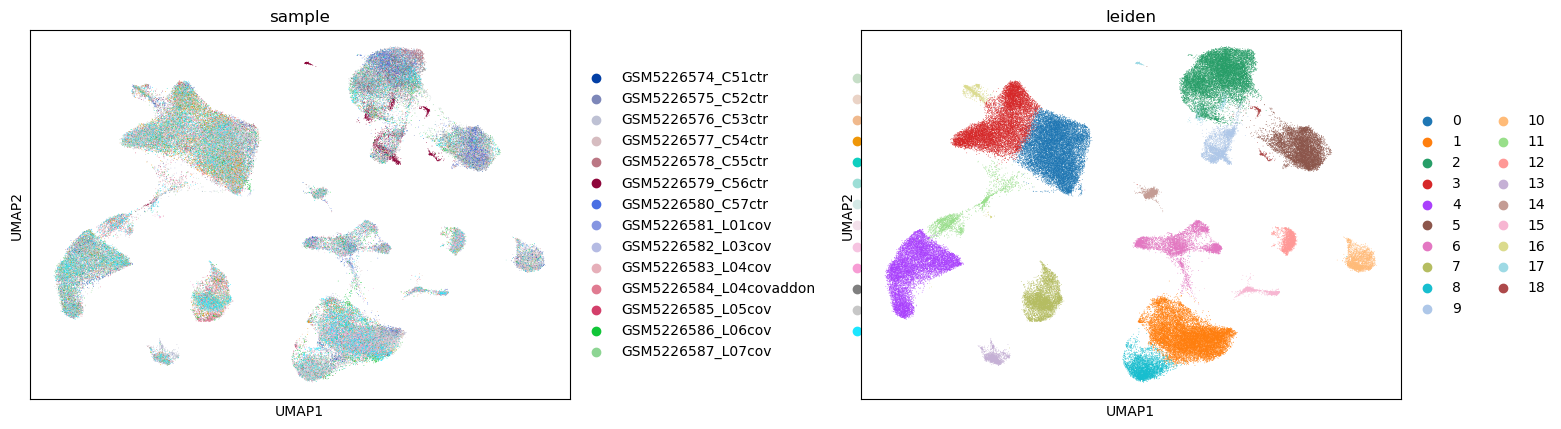

In [7]:
# Quick UMAP overview:
# - color by batch (e.g. "sample")
# - color by cluster ("louvain")
umap_colors = []

if "sample" in adata_proc.obs.columns:
    umap_colors.append("sample")

if "condition" in adata_proc.obs.columns:   # only if present in your data
    umap_colors.append("condition")

if "louvain" in adata_proc.obs.columns:
    umap_colors.append("louvain")

if "leiden" in adata_proc.obs.columns:
    umap_colors.append("leiden")

sc.pl.umap(
    adata_proc,
    color=umap_colors,
    wspace=0.4,
)


✔ Added 'sample_type' to adata.obs


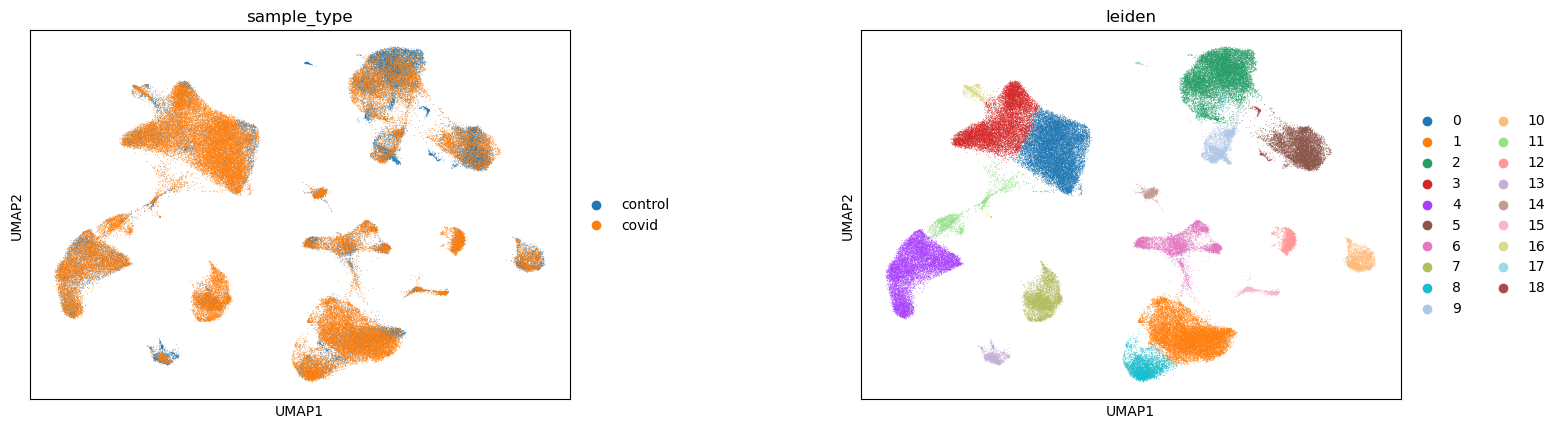

In [8]:
import numpy as np

def assign_sample_type(adata, sample_col="sample", new_col="sample_type"):
    samples = adata.obs[sample_col].astype(str)

    # Conditions
    is_ctr = samples.str.contains("ctr", case=False, regex=False)
    is_cov = samples.str.contains("cov", case=False, regex=False)

    # Check for invalid samples
    invalid = ~(is_ctr | is_cov)
    if invalid.any():
        bad = samples[invalid].tolist()
        raise ValueError(f"❌ Unrecognized sample names (neither 'ctr' nor 'cov'): {bad}")

    # Assign values
    adata.obs[new_col] = np.where(is_ctr, "control", "covid")

    print(f"✔ Added '{new_col}' to adata.obs")
    return adata
adata_proc = assign_sample_type(adata_proc)
sc.pl.umap(
    adata_proc,
    color=['sample_type','leiden'],
    wspace=0.4,
)

In [9]:
from scrna_pipeline.annotation import score_markers_and_suggest_labels

# ------------------------------------------------------------------
# 1) Define marker dictionary (unchanged)
# ------------------------------------------------------------------
# marker_dict = {
#     # -----------------------
#     # Epithelial subtypes
#     # -----------------------
#     "Epi_Luminal": [
#         "EPCAM", "KRT8", "KRT18", "KRT19",
#         "MUC1",
#     ],
#     "Epi_Basal": [
#         "KRT5", "KRT14", "KRT17", "TP63",
#     ],
#     "Epi_Cycling": [
#         "MKI67", "TOP2A", "BIRC5", "CCNB1", "CDC20",
#     ],

#     # -----------------------
#     # Immune lineages
#     # -----------------------
#     "T_cell": [
#         "CD3D", "CD3E", "CD2", "CD8A", "CD4",
#     ],
#     "B_cell": [
#         "MS4A1", "CD79A", "CD79B",
#     ],
#     "Myeloid": [
#         "LYZ", "S100A8", "S100A9", "LGALS3",
#     ],

#     # -----------------------
#     # Stromal + mast
#     # -----------------------
#     "Endothelial": [
#         "PECAM1", "VWF", "KDR",
#     ],
#     "Fibroblast": [
#         "COL1A1", "COL1A2", "DCN", "LUM",
#     ],
#     "Mast": [
#         "TPSAB1", "TPSB2", "CPA3", "KIT", "HDC", "MS4A2",
#     ],
# }

# marker_dict = {
#     # ----------------------- Immune System -----------------------
#     "CD4+ T cells": [
#         "IL7R", "CCR7", "TCF7", "LTB", "MAL"
#     ],
#     "CD8+ T cells": [
#         "CD8A", "CD8B", "GZMK", "CCL5", "TRAC"
#     ],
#     "Tregs": [
#         "FOXP3", "IL2RA", "CTLA4", "IKZF2", "TNFRSF18"
#     ],
#     "NK cells": [
#         "GNLY", "NKG7", "PRF1", "GZMB", "KLRD1"
#     ],
#     "Cycling T/NK": [
#         "MKI67", "TOP2A", "CENPF", "BIRC5", "ASPM"
#     ],
#     "B cells": [
#         "MS4A1",      # CD20
#         "CD79A",
#         "CD79B",
#         "CD74",
#         "BANK1"
#     ],
#     "Plasma cells": [
#         "JCHAIN",
#         "MZB1",
#         "SDC1",      # CD138
#         "PRDM1",
#         "IGHG1"
#     ],
#     "Monocytes": [
#         "LYZ",
#         "S100A8",
#         "S100A9",
#         "FCN1",
#         "CTSS"
#     ],
#     "Macrophages": [
#         "C1QA",
#         "C1QB",
#         "C1QC",
#         "MRC1",     # CD206
#         "APOE"
#     ],
#     "Dendritic cells": [
#         "ITGAX",     # CD11c (cDC)
#         "CD1C",      # cDC2
#         "CLEC9A",    # cDC1
#         "LILRA4",    # pDC
#         "HLA-DRA"
#     ],
#     "Mast cells": [
#         "KIT",
#         "TPSAB1",
#         "TPSB2",
#         "CPA3",
#         "HDC"
#     ],

#     # ----------------------- Lung Epithelial -----------------------
#     "AT1": [
#         "AGER",
#         "PDPN",
#         "CAV1",
#         "AQP5",
#         "CLDN18"
#     ],
#     "AT2": [
#         "SFTPC",
#         "SFTPB",
#         "SFTPA1",
#         "ABCA3",
#         "SLC34A2"
#     ],
#     "Club epithelial": [
#         "SCGB1A1",
#         "SCGB3A1",
#         "KRT8",
#         "KRT18",
#         "EPCAM"
#     ],
#     "Basal epithelial": [
#         "KRT5",
#         "KRT14",
#         "TP63",
#         "KRT17",
#         "ITGA6"
#     ],

#     # ----------------------- Stromal & Vascular -----------------------
#     "Fibroblasts": [
#         "COL1A1",
#         "COL1A2",
#         "COL3A1",
#         "DCN",
#         "LUM"
#     ],
#     "Smooth muscle / Pericytes": [
#         "ACTA2",
#         "MYH11",
#         "TAGLN",
#         "PDGFRB",
#         "RGS5"
#     ],
#     "Endothelial (vascular)": [
#         "VWF",
#         "PECAM1",    # CD31
#         "CDH5",      # VE-cadherin
#         "KDR",       # VEGFR2
#         "ESAM"
#     ],
#     "Lymphatic endothelial": [
#         "LYVE1",
#         "PROX1",
#         "PDPN",
#         "MMRN1",
#         "CCL21"
#     ],
# }


marker_dict = {
    # ----------------------------- Epithelial -----------------------------
    "Airway epithelial cells": [
        "EPCAM",      # pan-epithelial
        "KRT8", "KRT18",  # luminal epithelial
        "SCGB1A1",        # club/secretory
        "FOXJ1"           # ciliated epithelial program
    ],

    "AT1": [
        "AGER", 
        "PDPN", 
        "CAV1",
        "CLDN18",
        "AQP5"
    ],

    "AT2": [
        "SFTPC",
        "SFTPB",
        "SFTPA1",
        "ABCA3",
        "SLC34A2"
    ],

    "Other epithelial cells": [
        "EPCAM",         # baseline epithelial identity
        "KRT19",         # luminal cytokeratin
        "MUC1",          # surface mucin
        "KRT8", "KRT18"
    ],

    # ----------------------------- Immune (Adaptive) -----------------------------
    "B cells": [
        "MS4A1",        # CD20
        "CD79A",
        "CD79B",
        "CD74",
        "BANK1"
    ],

    "Plasma cells": [
        "JCHAIN",
        "MZB1",
        "SDC1",          # CD138
        "IGHG1",
        "PRDM1"
    ],

    "CD4+ T cells": [
        "IL7R",
        "CCR7",
        "TCF7",
        "LTB",
        "MAL"
    ],

    "CD8+ T cells": [
        "CD8A",
        "CD8B",
        "GZMK",
        "CCL5",
        "TRAC"
    ],

    "Tregs": [
        "FOXP3",
        "IL2RA",
        "CTLA4",
        "IKZF2",
        "TNFRSF18"
    ],

    # ----------------------------- Immune (Innate) -----------------------------
    "NK cells": [
        "GNLY",
        "NKG7",
        "PRF1",
        "GZMB",
        "KLRD1"
    ],

    "Cycling NK/T cells": [
        "MKI67",
        "TOP2A",
        "CENPF",
        "ASPM",
        "BIRC5"
    ],

    "Monocytes": [
        "LYZ",
        "S100A8",
        "S100A9",
        "FCN1",
        "CTSS"
    ],

    "Macrophages": [
        "C1QA",
        "C1QB",
        "C1QC",
        "MRC1",
        "APOE"
    ],

    "Dendritic cells": [
        "ITGAX",         # CD11c
        "CD1C",          # cDC2
        "CLEC9A",        # cDC1
        "LILRA4",        # pDC
        "HLA-DRA"
    ],

    "Mast cells": [
        "KIT",
        "TPSAB1",
        "TPSB2",
        "CPA3",
        "HDC"
    ],

    # ----------------------------- Stromal & Vascular -----------------------------
    "Fibroblasts": [
        "COL1A1",
        "COL1A2",
        "COL3A1",
        "DCN",
        "LUM"
    ],

    "Smooth muscle": [
        "ACTA2",
        "MYH11",
        "TAGLN",
        "RGS5",
        "PDGFRB"
    ],

    "Endothelial cells": [
        "VWF",
        "PECAM1",        # CD31
        "CDH5",          # VE-cadherin
        "KDR",
        "ESAM"
    ],

    # ----------------------------- Nervous system -----------------------------
    "Neuronal cells": [
        "RBFOX3",        # NeuN
        "TUBB3",         # β3-tubulin
        "MAP2",
        "SNAP25",
        "SYT1"
    ],
}


# ------------------------------------------------------------------
# 2) Pick a cluster column automatically
# ------------------------------------------------------------------
if "leiden" in adata_proc.obs:
    cluster_key = "leiden"
elif "louvain" in adata_proc.obs:
    cluster_key = "louvain"
elif "cluster" in adata_proc.obs:
    # in case you manually created a generic cluster column
    cluster_key = "cluster"
else:
    raise ValueError(
        "No clustering column found in `adata.obs`. "
        "Expected one of: 'leiden', 'louvain', or 'cluster'."
    )

print(f"Using cluster_key = '{cluster_key}' for marker-based annotation.")

# ------------------------------------------------------------------
# 3) Score markers and get suggested labels
# ------------------------------------------------------------------
cluster_scores, suggested = score_markers_and_suggest_labels(
    adata_proc,
    marker_dict=marker_dict,
    cluster_key=cluster_key,
    use_raw=True
)

# ------------------------------------------------------------------
# 4) Pretty display (with fallback if styling fails)
# ------------------------------------------------------------------
try:
    display(
        cluster_scores
        .round(2)
        .style
        .background_gradient(cmap="viridis")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            dict(selector="th", props=[("text-align", "center")]),
        ])
    )
except Exception as e:
    # e.g. jinja2 not installed or in non-notebook context
    print("Styled display failed, showing plain table instead:", repr(e))
    display(cluster_scores.round(2))

# If you want, you can also inspect the suggested labels:
suggested


Using cluster_key = 'leiden' for marker-based annotation.


/Users/alahi.irfan/Desktop/Local_workspace/scRNA-seq-pipeline/scrna_pipeline/annotation.py:148: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(cluster_key)[score_cols]


,Airway epithelial cells,AT1,AT2,Other epithelial cells,B cells,Plasma cells,CD4+ T cells,CD8+ T cells,Tregs,NK cells,Cycling NK/T cells,Monocytes,Macrophages,Dendritic cells,Mast cells,Fibroblasts,Smooth muscle,Endothelial cells,Neuronal cells
leiden,,,,,,,,,,,,,,,,,,,
0,-0.030000,-0.120000,-0.400000,-0.160000,0.170000,-0.070000,-0.020000,-0.020000,-0.010000,-0.040000,-0.060000,0.180000,0.880000,0.820000,-0.020000,-0.530000,-0.050000,-0.000000,-0.100000
1,-0.040000,-0.090000,-0.330000,-0.160000,-0.270000,-0.080000,-0.050000,-0.020000,-0.010000,-0.030000,-0.040000,-0.050000,-0.320000,-0.280000,-0.020000,1.570000,0.210000,-0.130000,-0.010000
2,-0.020000,-0.050000,1.720000,0.560000,-0.110000,-0.100000,-0.060000,-0.020000,-0.010000,-0.040000,-0.050000,-0.050000,-0.410000,-0.270000,-0.020000,-0.490000,-0.080000,-0.150000,-0.040000
3,-0.020000,-0.100000,-0.360000,-0.140000,-0.010000,-0.030000,-0.040000,-0.010000,0.020000,-0.030000,-0.040000,0.080000,0.280000,0.290000,-0.020000,-0.490000,-0.030000,0.010000,-0.060000
4,-0.020000,-0.080000,-0.300000,-0.110000,-0.230000,0.010000,0.310000,0.150000,0.100000,0.240000,-0.010000,-0.030000,-0.300000,-0.190000,-0.010000,-0.320000,-0.010000,-0.090000,-0.070000
5,-0.020000,0.990000,0.130000,0.330000,-0.140000,-0.110000,-0.070000,-0.020000,-0.010000,-0.020000,-0.060000,-0.060000,-0.430000,-0.270000,-0.020000,-0.470000,-0.060000,-0.130000,0.590000
6,0.060000,0.140000,-0.340000,-0.110000,-0.250000,-0.060000,0.010000,-0.010000,-0.030000,-0.010000,-0.060000,-0.040000,-0.350000,-0.220000,-0.010000,-0.260000,-0.010000,1.090000,0.060000
7,-0.040000,-0.060000,-0.300000,-0.130000,-0.200000,1.360000,-0.050000,-0.020000,-0.040000,-0.040000,0.230000,-0.040000,-0.300000,-0.220000,-0.020000,-0.330000,-0.050000,0.020000,-0.050000
8,-0.040000,-0.120000,-0.370000,-0.170000,-0.280000,-0.090000,-0.050000,-0.020000,-0.010000,-0.020000,-0.070000,-0.060000,-0.340000,-0.270000,-0.020000,1.140000,0.150000,-0.140000,-0.030000


leiden
0                 Macrophages
1                 Fibroblasts
2                         AT2
3             Dendritic cells
4                CD4+ T cells
5                         AT1
6           Endothelial cells
7                Plasma cells
8                 Fibroblasts
9      Other epithelial cells
10    Airway epithelial cells
11         Cycling NK/T cells
12          Endothelial cells
13                    B cells
14                 Mast cells
15              Smooth muscle
16            Dendritic cells
17     Other epithelial cells
18                        AT2
dtype: object

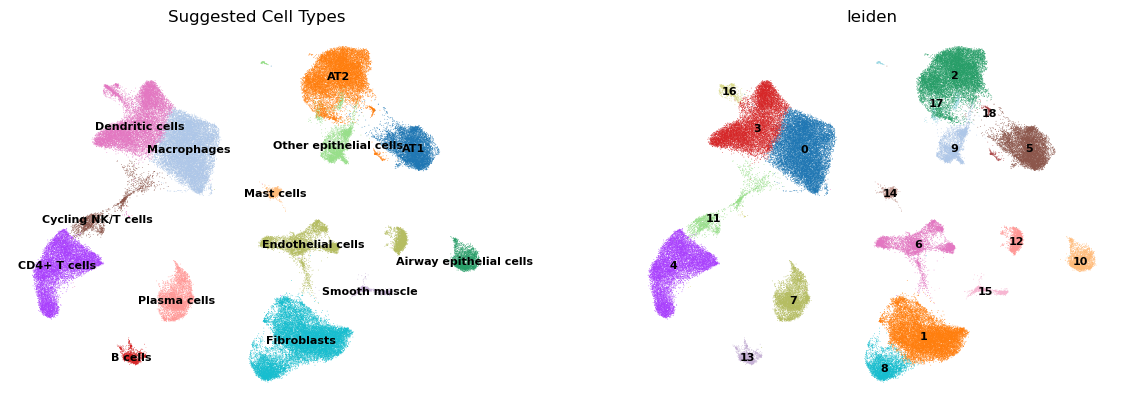

In [10]:


# Attach suggested labels for plotting
adata_proc.obs["celltype"] = adata_proc.obs[cluster_key].map(suggested)


sc.pl.umap(
    adata_proc,
    color=["celltype",cluster_key],
    legend_loc="on data",
    legend_fontsize=8,
    frameon=False,
    title="Suggested Cell Types",
 
)

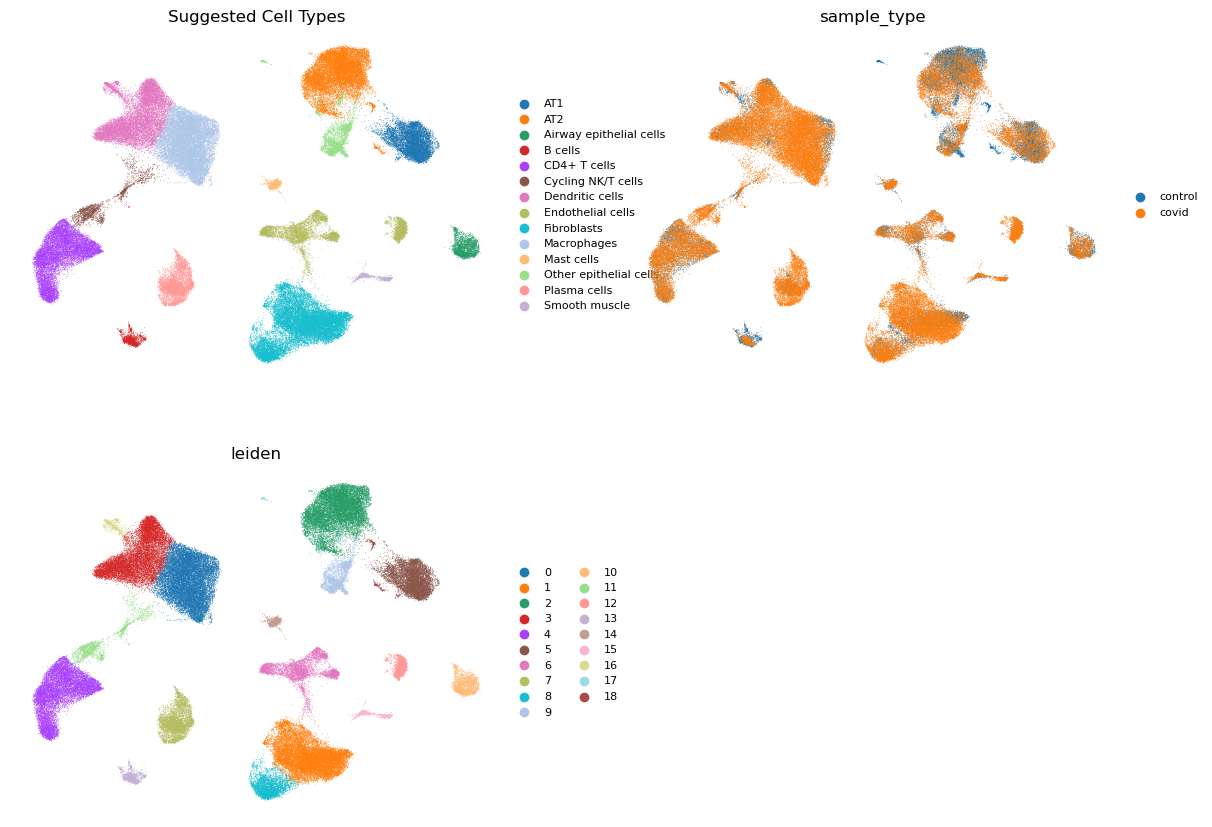

In [11]:
sc.pl.umap(
    adata_proc,
    color=["celltype","sample_type",cluster_key],
  
    legend_fontsize=8,
    frameon=False,
    title="Suggested Cell Types",
    ncols=2
    
    
)

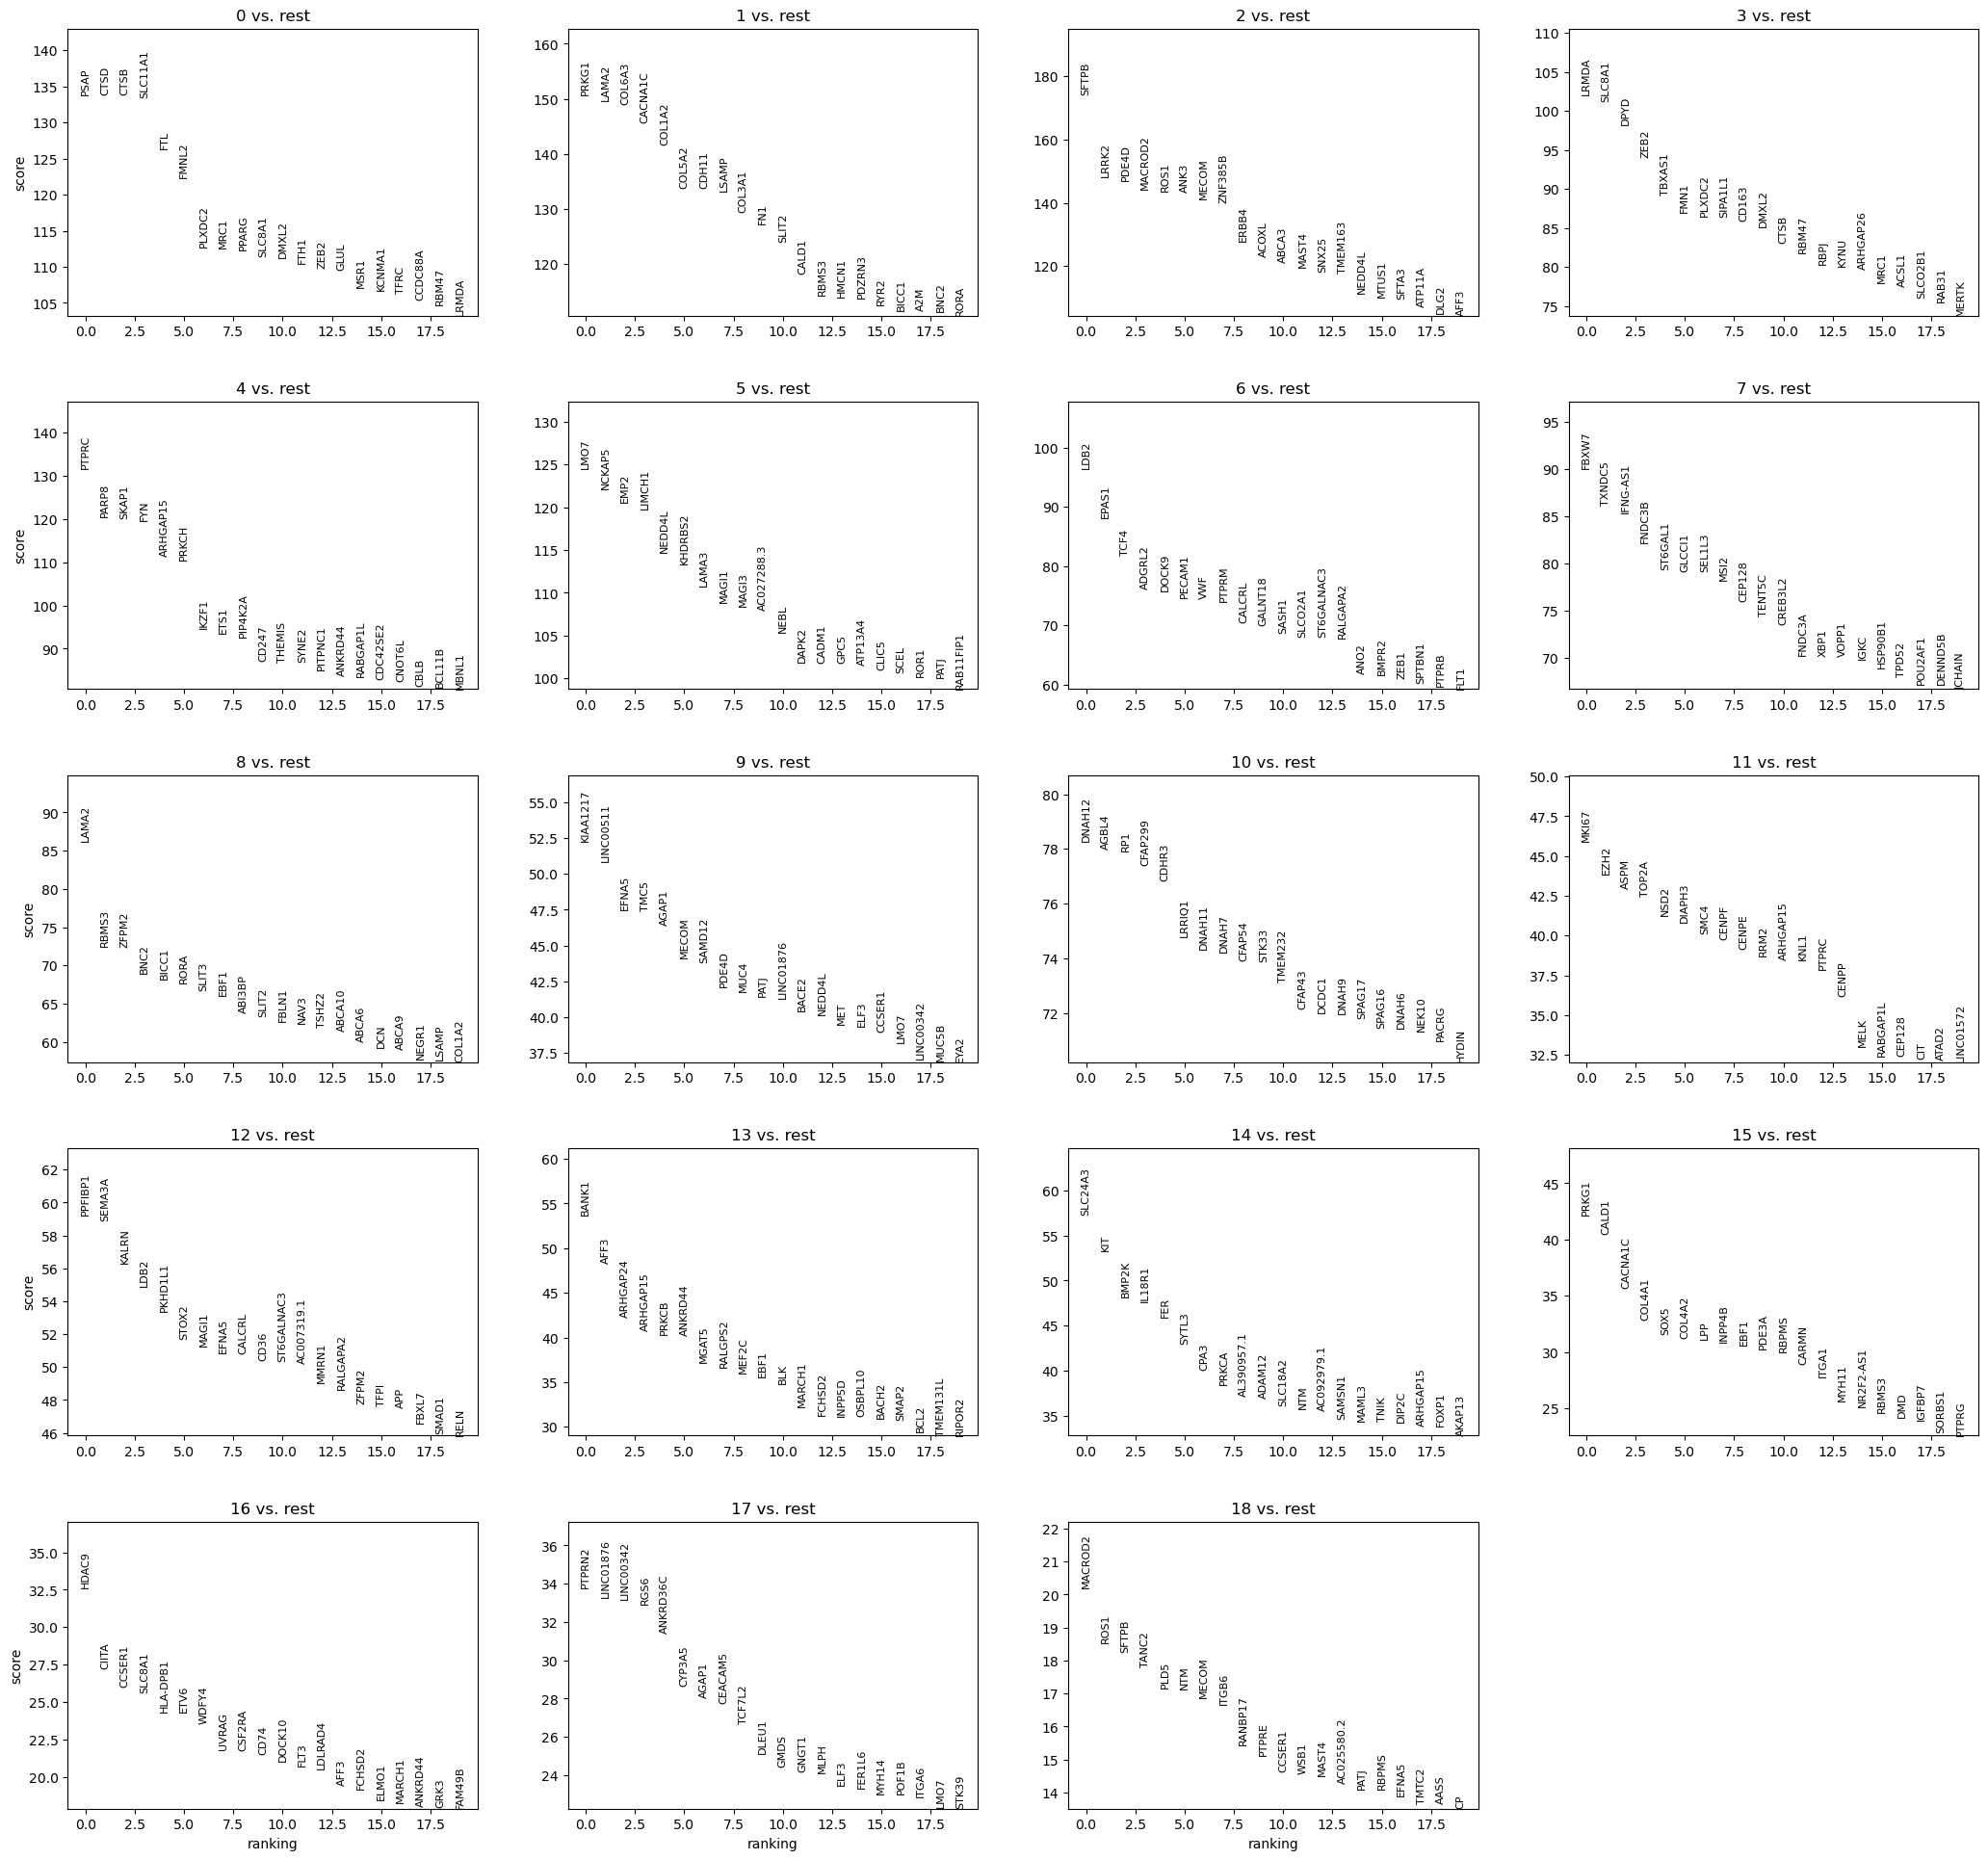

In [12]:
sc.tl.rank_genes_groups(
    adata_proc,
    groupby=cluster_key,
    reference="rest",
    method="wilcoxon",
    use_raw=True,
)

sc.pl.rank_genes_groups(adata_proc, n_genes=20, sharey=False)

/var/folders/mr/gbhgcyxx2yz6w_nj9nmtr2nc0000gr/T/ipykernel_19411/3289801366.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(sample_col)[sample_type_col]
/var/folders/mr/gbhgcyxx2yz6w_nj9nmtr2nc0000gr/T/ipykernel_19411/3289801366.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([sample_col, celltype_col])
/var/folders/mr/gbhgcyxx2yz6w_nj9nmtr2nc0000gr/T/ipykernel_19411/3289801366.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

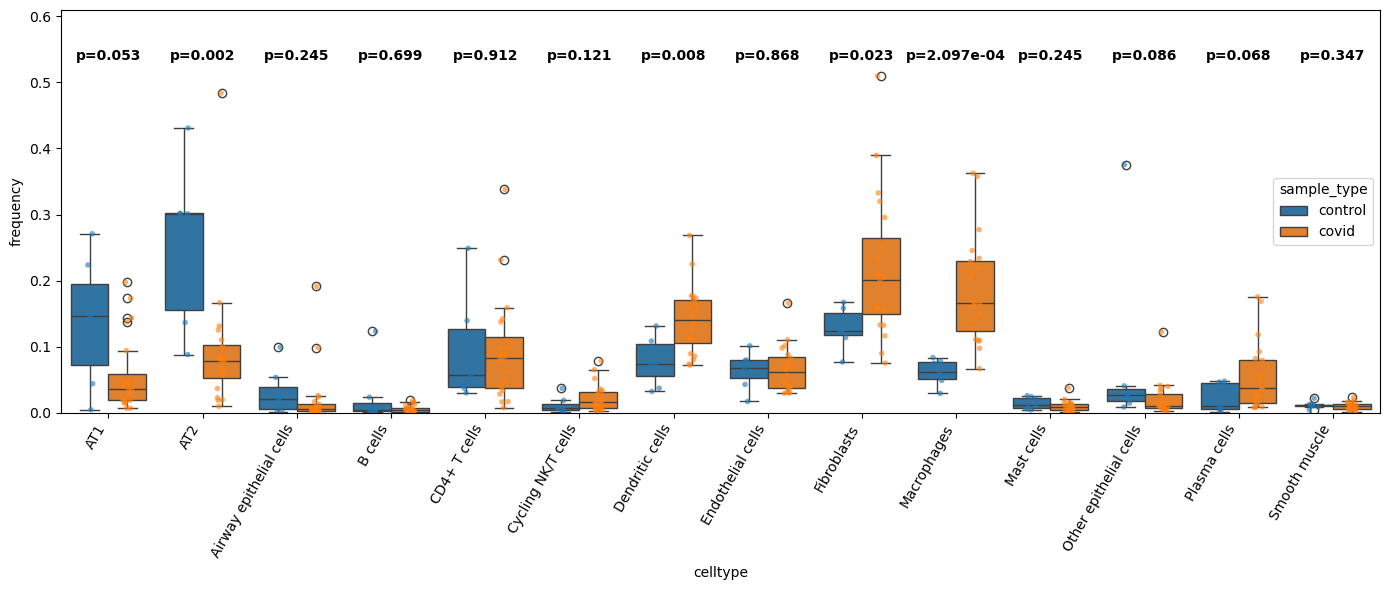

In [13]:
import pandas as pd
from anndata import AnnData

def compute_celltype_freq_per_sample(
    adata: AnnData,
    sample_col: str = "sample",           # e.g. GSM5226574_C51ctr
    sample_type_col: str = "sample_type", # e.g. "control" / "covid"
    celltype_col: str = "celltype",
) -> pd.DataFrame:
    """
    Compute per-sample cell type frequencies from an AnnData object.

    For each (sample, celltype) pair, this function counts how many cells
    belong to that cell type within the sample, computes the total number
    of cells in the sample, and returns:

        frequency = n_cells / total_cells

    Includes the sample_type (e.g. "control" or "covid") for each sample.
    """

    # Extract only the columns required for computation
    df = adata.obs[[sample_col, sample_type_col, celltype_col]].copy()

    # ------------------------------------------------------------------
    # 🔍 SANITY CHECK — ensure each sample has EXACTLY ONE sample_type
    # ------------------------------------------------------------------
    # Count distinct sample_type values per sample
    type_counts = (
        df.groupby(sample_col)[sample_type_col]
        .nunique()
        .rename("n_types")
    )

    # Detect problematic samples
    bad_samples = type_counts[type_counts > 1]

    if len(bad_samples) > 0:
        msg_lines = [
            "❌ ERROR: Some samples have MORE THAN ONE sample_type.",
            "Each sample must belong to exactly one sample_type.",
            "",
            "Problematic samples:",
        ]
        for s in bad_samples.index:
            unique_types = df.loc[df[sample_col] == s, sample_type_col].unique()
            msg_lines.append(f"  - {s}: {list(unique_types)}")
        msg = "\n".join(msg_lines)
        raise ValueError(msg)

    # ------------------------------------------------------------------
    # 1) Count cells for each (sample, celltype)
    # ------------------------------------------------------------------
    counts = (
        df.groupby([sample_col, celltype_col])
          .size()
          .rename("n_cells")
          .reset_index()
    )

    # ------------------------------------------------------------------
    # 2) Total cells per sample
    # ------------------------------------------------------------------
    totals = (
        df.groupby(sample_col)
          .size()
          .rename("total_cells")
          .reset_index()
    )

    # ------------------------------------------------------------------
    # 3) Merge and compute frequency per cell type
    # ------------------------------------------------------------------
    freq = counts.merge(totals, on=sample_col, how="left")
    freq["frequency"] = freq["n_cells"] / freq["total_cells"]

    # ------------------------------------------------------------------
    # 4) Add sample_type column back to frequency table
    # ------------------------------------------------------------------
    sample_to_type = (
        df[[sample_col, sample_type_col]]
        .drop_duplicates()
        .set_index(sample_col)[sample_type_col]
    )

    freq["sample_type"] = freq[sample_col].map(sample_to_type)

    return freq

import pandas as pd
from scipy.stats import ranksums


def compute_groupwise_wilcoxon(
    data: pd.DataFrame,
    group_col: str,
    value_col: str,
    category_col: str | None = None,
):
    """
    Compute Wilcoxon rank-sum p-values between TWO groups in `group_col`.

    If `category_col` is provided:
        - Perform a separate test for each category (e.g. each cell type).
        - Returns a dict: {category_value -> p-value or None}.

    If `category_col` is None:
        - Perform a SINGLE test over the entire DataFrame.
        - Returns a single float p-value.

    Parameters
    ----------
    data : pd.DataFrame
        Input table containing at least `group_col` and `value_col`,
        and optionally `category_col`.
    group_col : str
        Column name indicating the group labels (must have exactly 2 groups).
    value_col : str
        Column name with the numeric values to compare.
    category_col : str or None, default None
        If given, compute one p-value per category in this column.
        If None, compute a single p-value over all rows.

    Returns
    -------
    pvals : dict or float
        - dict if `category_col` is not None: {category -> p-value or None}
        - float if `category_col` is None: a single p-value
    """
    # Ensure exactly two groups are present
    groups = data[group_col].dropna().unique()
    if len(groups) != 2:
        raise ValueError(
            f"Wilcoxon rank-sum requires exactly 2 groups in '{group_col}', "
            f"but found {len(groups)}: {groups}"
        )
    g1, g2 = groups

    # Case 1: no category_col → single global test
    if category_col is None:
        x = data[data[group_col] == g1][value_col].values
        y = data[data[group_col] == g2][value_col].values

        if len(x) == 0 or len(y) == 0:
            return None

        stat, p = ranksums(x, y)
        return p

    # Case 2: groupwise tests per category
    pvals: dict = {}

    for cat in data[category_col].unique():
        sub = data[data[category_col] == cat]

        x = sub[sub[group_col] == g1][value_col].values
        y = sub[sub[group_col] == g2][value_col].values

        if len(x) > 0 and len(y) > 0:
            stat, p = ranksums(x, y)
            pvals[cat] = p
        else:
            # If one of the groups is missing for this category
            pvals[cat] = None

    return pvals


import seaborn as sns
import matplotlib.pyplot as plt


def plot_grouped_boxplot_with_pvalues(
    data: pd.DataFrame,
    x_col: str,          # category on x-axis (e.g. "celltype")
    y_col: str,          # numeric value (e.g. "frequency")
    hue_col: str,        # group column (e.g. "sample_type")
    figsize=(14, 6),
    add_strip: bool = True,
    jitter_alpha: float = 0.6,
    jitter_size: int = 4,
    pvalue_y_offset: float = 0.02,
):
    """
    Make a boxplot (optionally with jittered points) for y_col ~ x_col,
    colored by hue_col, and annotate each x-category with a Wilcoxon
    rank-sum p-value comparing the two hue groups.

    Parameters
    ----------
    data : pd.DataFrame
        Long-format DataFrame containing at least [x_col, y_col, hue_col].
    x_col : str
        Column name for categories on the x-axis.
    y_col : str
        Column name for numeric values on the y-axis.
    hue_col : str
        Column name for the grouping variable used as hue (must have 2 groups).
    figsize : tuple, default (14, 6)
        Figure size passed to matplotlib.
    add_strip : bool, default True
        Whether to overlay individual data points as a stripplot.
    jitter_alpha : float, default 0.6
        Transparency for stripplot points.
    jitter_size : int, default 4
        Size of stripplot points.
    pvalue_y_offset : float, default 0.02
        Vertical offset above the max y-value for placing p-value labels.

    Returns
    -------
    ax : matplotlib.axes.Axes
        The Axes object of the generated plot.
    """
    # -------------------------------------------------------------
    # 1) Compute Wilcoxon p-values per x-category
    # -------------------------------------------------------------
    pvals = compute_groupwise_wilcoxon(
        data=data,
        group_col=hue_col,
        value_col=y_col,
        category_col=x_col,
    )

    # -------------------------------------------------------------
    # 2) Make the boxplot (and optional stripplot)
    # -------------------------------------------------------------
    plt.figure(figsize=figsize)
    ax = plt.gca()

    sns.boxplot(
        data=data,
        x=x_col,
        y=y_col,
        hue=hue_col,
        dodge=True,
        ax=ax,
    )

    if add_strip:
        sns.stripplot(
            data=data,
            x=x_col,
            y=y_col,
            hue=hue_col,
            dodge=True,
            alpha=jitter_alpha,
            size=jitter_size,
            ax=ax,
        )

    # Rotate x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

    ax.set_ylabel(y_col)
    plt.tight_layout()

    # Avoid double legend (box + strip both add entries)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], title=hue_col)

    # -------------------------------------------------------------
    # 3) Add p-value annotations above each x-category
    # -------------------------------------------------------------
    max_y = data[y_col].max()
    categories = data[x_col].unique()

    for i, cat in enumerate(categories):
        p = pvals.get(cat, None)

        if p is None:
            text = "n/a"
        else:
            text = f"p={p:.3e}" if p < 0.001 else f"p={p:.3f}"

        ax.text(
            i,                         # x-position (category index)
            max_y + pvalue_y_offset,   # y-position
            text,
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    # Add headroom so labels are visible
    ax.set_ylim(0, max_y + pvalue_y_offset * 5)

    return ax



freq = compute_celltype_freq_per_sample(adata=adata_proc, sample_col='sample',sample_type_col='sample_type',celltype_col='celltype')

ax = plot_grouped_boxplot_with_pvalues(
    data=freq,
    x_col="celltype",
    y_col="frequency",
    hue_col="sample_type",
)
plt.show()